In [33]:
# !/usr/bin/env python3


#Created at: 5.12.2021
#@author: xsechr00

from scipy.io import wavfile
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk
import cmath
import IPython

def dft(array):
    dft_arr = []
    arr_len = array.size
    for i in range(arr_len):
        coef = 0
        for j in range(arr_len):
            coef += array[j] * cmath.exp(-2j * cmath.pi * i * j * (1 / arr_len))
        dft_arr.append(coef)
    return dft_arr

#4.1
fs, data = wavfile.read("../audio/xsechr00.wav")

print("Pocet vzorku: ",data.size, "[Vzorek]")
time = data.size / fs
print("Delka signalu", time,"[s]")
print("MAX: ",data.max())
print("MIN:",data.min())    
#todo zobrazit na osu




Pocet vzorku:  45261 [Vzorek]
Delka signalu 2.8288125 [s]
MAX:  3712
MIN: -2189


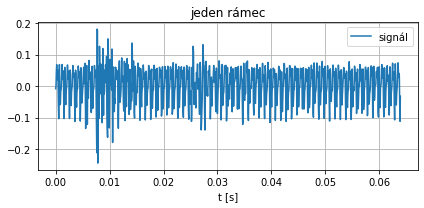

In [34]:
#4.2
mid = 0
for i in range(0,data.size):
    mid += data[i]

mid = mid / data.size

if( data.max() >= data.min() ):
    data = data / data.max()
else:
    data = data / abs(data.min())

frame_size = 1024 
number_of_frames =  data.size//512
# arr = np.ndarray((radek,sloupec))

begin = 0
end = 1024
offset = 512
frames = np.ndarray((87,1024)) #number of frames, length frame

for i in range(0,87):
    val = data[begin:end]
    for j in range(0,1024):
        frames[i][j] = val[j]
    begin+=offset
    end+=offset
        
frame = frames[4]

myrange = np.arange(1024)
plt.figure(figsize=(6,3))
plt.gca().set_xlabel('t [s]')
plt.gca().set_title('jeden rámec')
plt.plot(myrange/fs, frame, label="signál")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

/home/marek/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


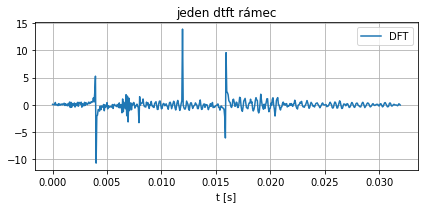

/home/marek/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


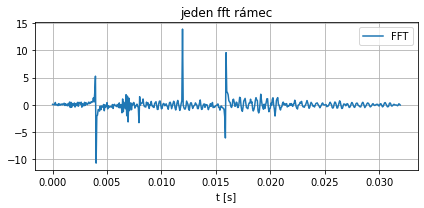

In [35]:
#*****************************************************
#4.3

frame_dft = dft(frame)
frame_dft = frame_dft[0:512]
myrange = np.arange(512)
plt.figure(figsize=(6,3))
plt.gca().set_xlabel('t [s]')
plt.gca().set_title('jeden dtft rámec')
plt.plot(myrange/fs, frame_dft, label="DFT")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

fft_frame = np.fft.fft(frame)
fft_frame = fft_frame[0:512]
myrange = np.arange(512)
plt.figure(figsize=(6,3))
plt.gca().set_xlabel('t [s]')
plt.gca().set_title('jeden fft rámec')
plt.plot(myrange/fs, fft_frame, label="FFT")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

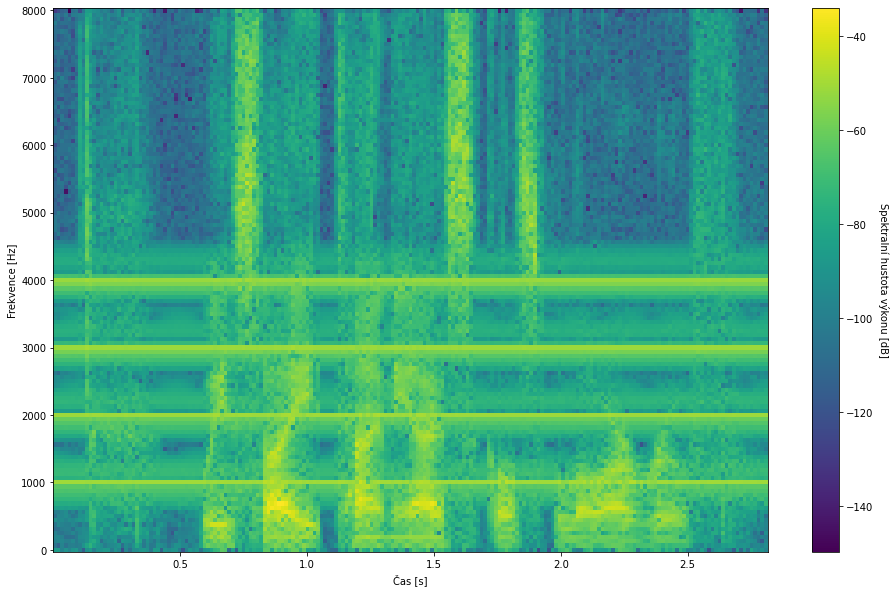

In [36]:
# 4.4
f, t, sgr = spectrogram(data, fs)
sgr_log = 10 * np.log10(sgr+1e-20) 

plt.figure(figsize=(16,10))
plt.pcolormesh(t,f,sgr_log)
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)



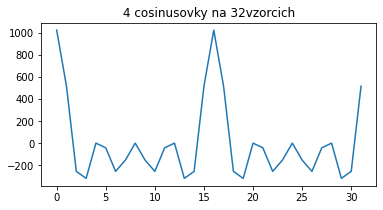

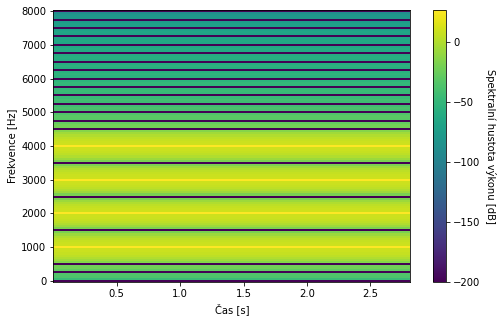

In [37]:
#4.5
# zpozorovane skrz priblizeni spektogramu
f = [1000,2000,3000,4000] #[Hz]
# f1 985-1000
# f2 1985-2000
# f3 2985-3000
# f4 3985-4000
#4.6
#source https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html

sr = fs
ts = 1.0/fs
t = np.arange(0,2.8288125,ts)
sig_gen = 0
for freq in f:
    sig_gen += 2**8*np.cos(2*np.pi*freq*t)

plt.figure(figsize=(6,3))
plt.gca().set_title('4 cosinusovky na 32vzorcich')
plt.plot(sig_gen[:32])
plt.show()
from scipy.io.wavfile import write
write("../audio/4cos.wav", sr, sig_gen.astype(np.int16))

f, t, sgr = spectrogram(sig_gen, fs)
sgr_log = 10 * np.log10(sgr+1e-20) 

plt.figure(figsize=(8,5))
plt.pcolormesh(t,f,sgr_log)
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)


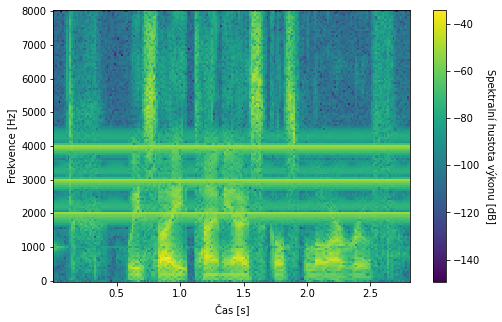

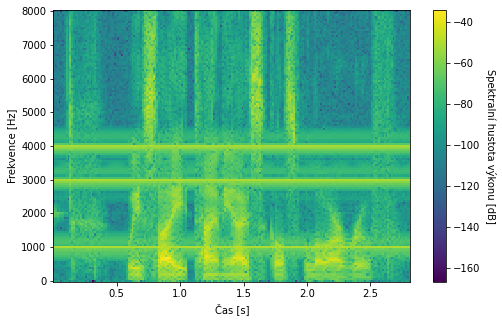

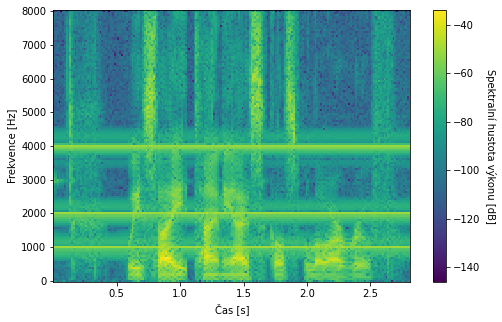

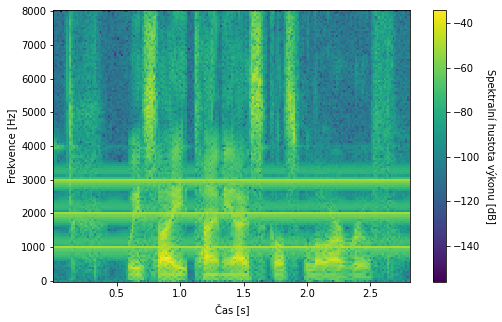

In [38]:
#4.7 pasmova zadrz
from scipy import signal
from scipy.signal import butter, lfilter

def butter_bandstop(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandstop')
    return b, a


def butter_bandstop_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandstop(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

spectras = []
xfilts = []
xfilts.append(data)
x_filt = data
frame_len = 1024
shift = 512
filtry = []
filt1 = butter_bandstop_filter(x_filt, 985 , 1015, fs)
filtry.append(filt1)

filt2 = butter_bandstop_filter(x_filt, 1970, 2000, fs)
filtry.append(filt2)

filt3 = butter_bandstop_filter(x_filt, 2970, 3000, fs)
filtry.append(filt3)

filt4 = butter_bandstop_filter(x_filt, 3970, 4000, fs)
filtry.append(filt4)


for i in filtry:
    f, t, sgr = spectrogram(i, fs)
    sgr_log = 10 * np.log10(sgr+1e-20) 

    plt.figure(figsize=(8,5))
    plt.pcolormesh(t,f,sgr_log)
    plt.gca().set_xlabel('Čas [s]')
    plt.gca().set_ylabel('Frekvence [Hz]')
    cbar = plt.colorbar()
    cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)
